In [1]:
import os
import xarray as xr
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt
import ssam_groups as groups

In [33]:
temp_file = "/ocean/rlovindeer/Atlantis/salish-sea-atlantis-model/inputs/SS_temp_07-21.nc"
salinity_file = "/ocean/rlovindeer/Atlantis/salish-sea-atlantis-model/inputs/SS_salt_07-21.nc"
exchange_file = "/ocean/rlovindeer/Atlantis/salish-sea-atlantis-model/inputs/SS_hydro_07-21.nc"

In [3]:
temp_ds = xr.open_dataset(temp_file)

In [34]:
temp_ds_2 = xr.open_dataset(temp_file,decode_cf=True)

In [4]:
temp_ds

<xarray.Dataset>
Dimensions:      (t: 21172, b: 130, z: 7)
Coordinates:
  * t            (t) datetime64[ns] 2006-12-31T14:00:00 ... 2021-06-28T08:00:00
Dimensions without coordinates: b, z
Data variables:
    temperature  (t, b, z) float64 ...
Attributes:
    title:       trivial
    geometry:    SS_xy.bgm
    parameters:

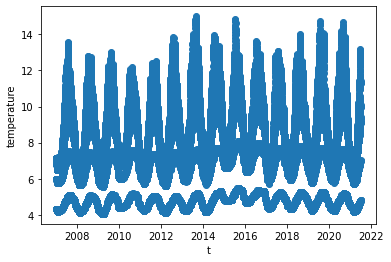

In [19]:
ss_temp = temp_ds.mean(dim='b')
ss_temp.plot.scatter('t','temperature', figsize=(19,3));

In [37]:
# Masking land boxes
Temps = np.ma.filled(temp_ds_2.temperature[1,:,5], np.nonzero)
(ocean_boxes) = Temps.nonzero()
ocean_boxes = ocean_boxes[0]
ocean_boxes = ocean_boxes[1:ocean_boxes.size-1]
ocean_boxes

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128])

In [ ]:
ss_temp_ocean = temp_ds_2[:,ocean_boxes,:]
all_ocean_temp = ss_temp_ocean.mean(dim='b')

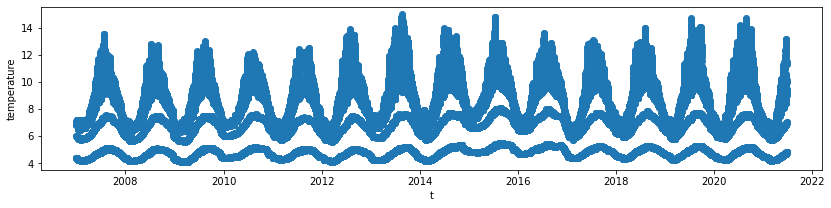

In [21]:
fig, ax = plt.subplots(figsize = (14,3))
ss_temp.plot.scatter('t','temperature', colors='black', ax=ax);

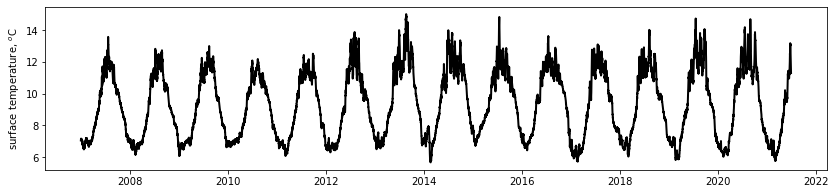

In [65]:
fig, ax = plt.subplots(figsize = (14,3))
ax.plot(ss_temp.t,ss_temp.temperature[:,5], '-k', linewidth=2);
ax.set_ylabel('surface temperature, $^{o}$C');

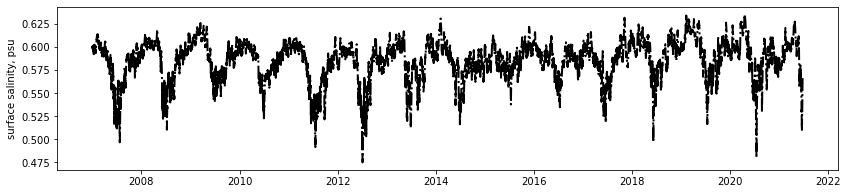

In [66]:
sal_ds = xr.open_dataset(salinity_file)
ss_salinity = sal_ds.mean(dim='b')
fig, ax = plt.subplots(figsize = (14,3))
ax.plot(ss_salinity.t,ss_salinity.salinity[:,5], '-.k', linewidth=2);
ax.set_ylabel('surface salinity, psu');

In [44]:
sal_ds

<xarray.Dataset>
Dimensions:   (t: 21172, b: 130, z: 7)
Coordinates:
  * t         (t) datetime64[ns] 2006-12-31T14:00:00 ... 2021-06-28T08:00:00
Dimensions without coordinates: b, z
Data variables:
    salinity  (t, b, z) float64 2.43 18.15 24.75 27.48 ... 30.38 0.0 0.0 19.58
Attributes:
    title:       trivial
    geometry:    SS_xy.bgm
    parameters:

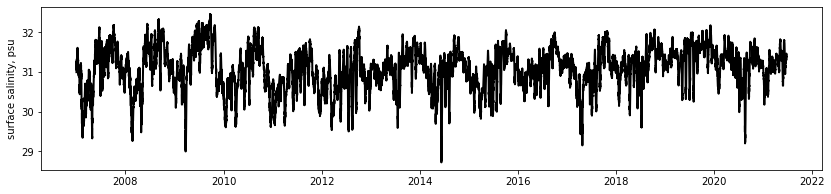

In [67]:
fig, ax = plt.subplots(figsize = (14,3))
ax.plot(sal_ds.t,sal_ds.salinity[:,2,2], '-k', linewidth=2); # Juan de Fuca Strait
ax.set_ylabel('surface salinity, psu');

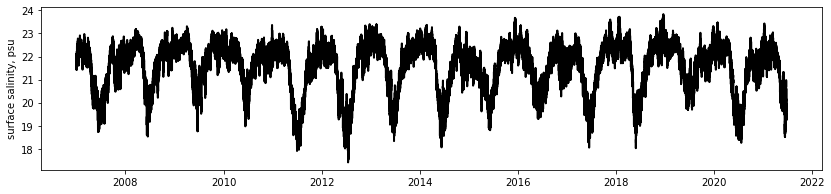

In [68]:
fig, ax = plt.subplots(figsize = (14,3))
ax.plot(sal_ds.t,sal_ds.salinity[:,80,2], '-k', linewidth=2); # SoG near Vancouver Harbour
ax.set_ylabel('surface salinity, psu');

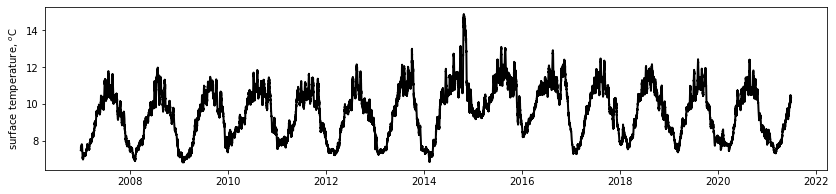

In [69]:
fig, ax = plt.subplots(figsize = (14,3))
ax.plot(temp_ds.t,temp_ds.temperature[:,2,2], '-k', linewidth=2); # Juan de Fuca Strait
ax.set_ylabel('surface temperature, $^{o}$C');

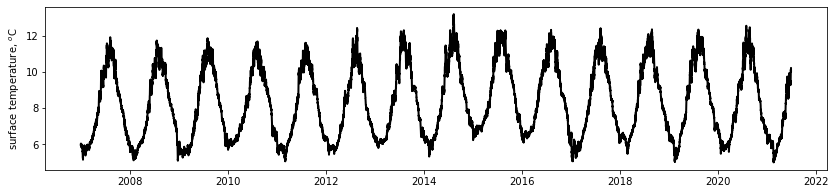

In [70]:
fig, ax = plt.subplots(figsize = (14,3))
ax.plot(temp_ds.t,temp_ds.temperature[:,80,2], '-k', linewidth=2); # SoG near Vancouver Harbour + Fraser River
ax.set_ylabel('surface temperature, $^{o}$C');